# Описание проекта

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и критиков, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**В рамках исследования планируется:**

* Посмотреть, сколько игр выпускалось в разные годы. 
* Посмотреть, как менялись продажи по платформам и выбрать несколько потенциально прибыльных платформ.
* Сравнить продажи по разным платформам. Установить, как влияют на продажи игр отзывы пользователей и критиков. 
* Посмотреть на общее распределение игр по жанрам и выделить самые прибыльные из них.

* Составить портрет пользователя каждого регион (NA, EU, JP): Самые популярные платформы (топ-5), самые популярные жанры (топ-5) в них.
* Понять, влияет ли рейтинг ESRB на продажи в разных регионах.

* Проверить следующие гипотезы: 1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2) Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

**Цель:** На основе найденных закономерностей посоветовать, на каком продукте сконцентрировать усилия разработчикам и маркетологам. 

# Проект по анализу игровой индустрии от магазина "Стримчик"

# 1. Изучение общей информации датасета

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import scipy
import statistics
import warnings

In [2]:
games = pd.read_csv('/datasets/games.csv')
games.info()
games.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


#### Вывод после ознакомления:
   1) В датасете 11 столбцов, из них 6 имеют вещественный тип данных, 5 тип object.
   
   2) В первых восьми столбцах почти нет пропусков, а вот в столбцах  Critic_Score, User_Score и Rating пропущено существенное количество данных (в районе 50%).
   
   3) Причина пропусков пока неясна.

# 2. Предобработка данных

In [3]:
games.columns = games.columns.str.lower()

In [4]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В списке значений есть 'tbd', что значит 'to be detirmined'(подлежит определению); похоже что у игр с таким рейтингом или мало оценок или они только вышли(еще не вышли) на момент выгрузки данных. 

Переведем столбец с оценкой пользователей в числовой формат(оцениваем игры числом от 0 до 10).

In [5]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

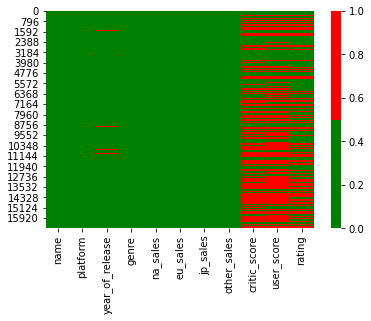

In [6]:
#посмотрим хитмап пропусков
colours = ['#008000', '#FF0000']
sns.heatmap(games.isna(), cmap = sns.color_palette(colours));

#### Вывод: 
Основной объем пропусков приходится на столбцы оценок и рейтинга, поэтому удалять строки с отсутствующими значениями не стоит(да и удаление 50% данных приведет к тому, что исследование окажется нерелевантным). Как видно по хитмапу, пропуски сотвествуют почти для всех строк с отсутствующими значениями, а значит их природа неслучайна.

In [7]:
games['rating'] = games['rating'].fillna(value = '')
# Для избежания ошибки при изменении формата столбца с годом выпуска игры на int, заменим пропуски на 2077(живем в Киберпанке)
games['year_of_release'] = games['year_of_release'].fillna(2077) 
games['year_of_release'] = games['year_of_release'].astype('int')
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,


In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Проверим наличие дубликатов:

In [9]:
games.duplicated().sum()

0

**Дубликатов нет.**

Посчитаем суммарные продажи игр во всех регионах и добавим их в отдельный столбец:

In [10]:
games['sum_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head(20) 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,,28.31


In [11]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
 11  sum_sales        16715 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'wwe Smackdown vs. Raw 2006' '¡Shin Chan Flipa en colores!' nan]
name : кол-во N

# Исследовательский анализ данных

Посмотрим статистику по выпуску игр в зависимости от года:

In [12]:
games.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
2077     269
Name: name, dtype: int64

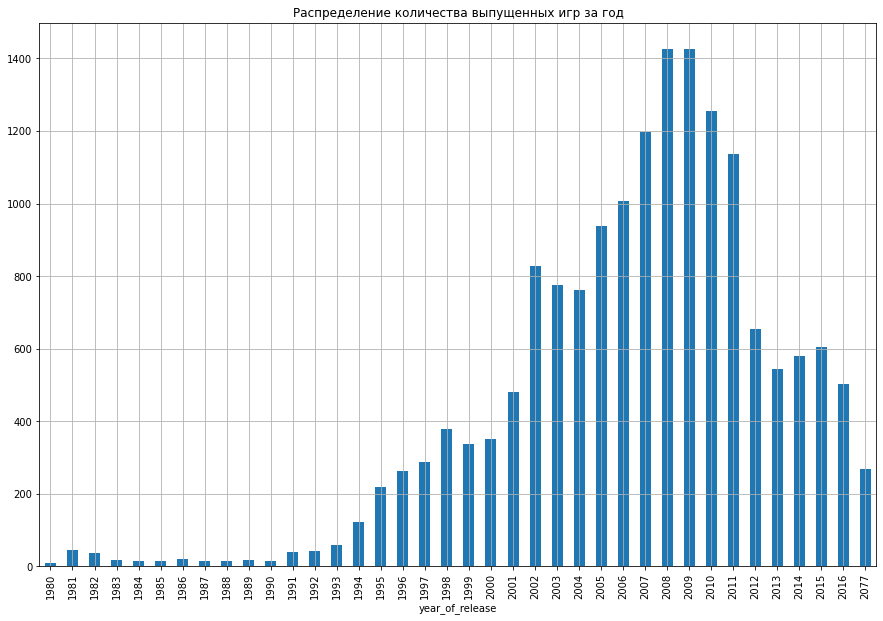

In [13]:
(games.groupby('year_of_release')['name'].count()
    .plot(kind = 'bar', figsize = (15, 10), grid = True, xlim = (1980, 2016))
);
plt.title('Распределение количества выпущенных игр за год');

#### Вывод: 
В восьмидесятые годы количество вышедших игр находилось примерно на одном уровне, а с начала девяностых неуклонно росло, достигнув в промежутке с 1990(16 новинок) до 2008 года значения в 1427 новых игр. Потом количество игр пошло на спад и на 2016 год составляло всего 502 штуки за год.

Посмотрим наиболее популярные платформы:

In [14]:
games.groupby(by = 'platform').agg({'sum_sales':'sum'}).sort_values(by = 'sum_sales', ascending=False).head(10)

,sum_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


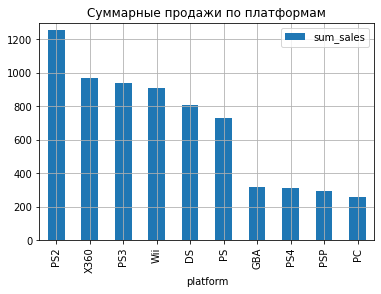

In [15]:
(games.groupby(by = 'platform').agg({'sum_sales':'sum'}).sort_values(by = 'sum_sales', ascending=False).head(10)
    .plot(kind = 'bar', grid = True, ylim = (0, 1300))
);
plt.title('Суммарные продажи по платформам');

**Вывод:** самая популярная платформа за все время PS2, в топе также X360, PS3, Wii и DS. PC лишь на десятом месте.

Построим гистограммы для пяти самых популярных платформ по годам:

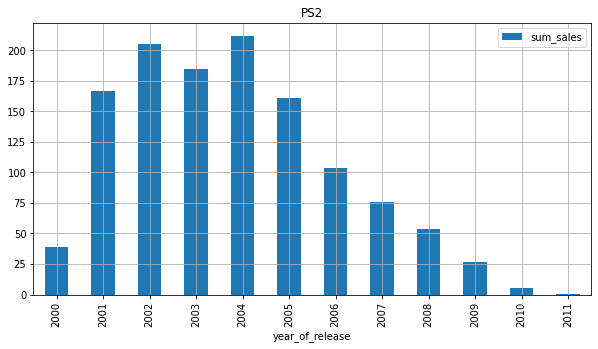

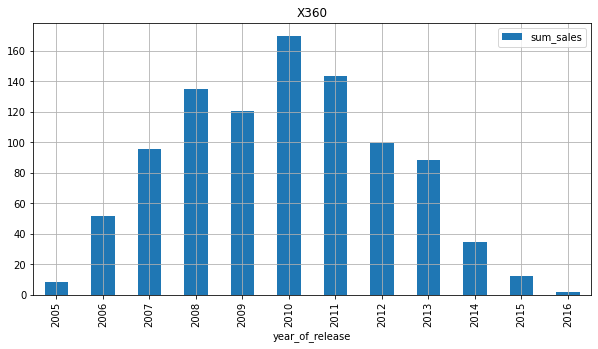

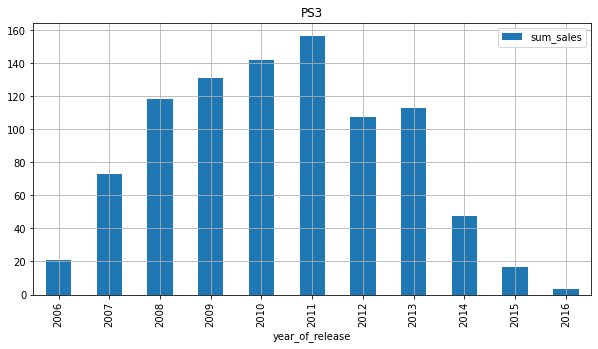

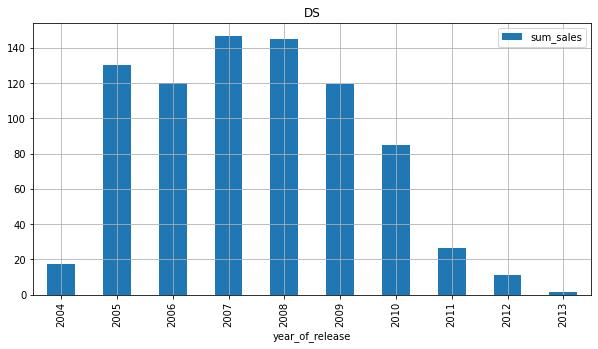

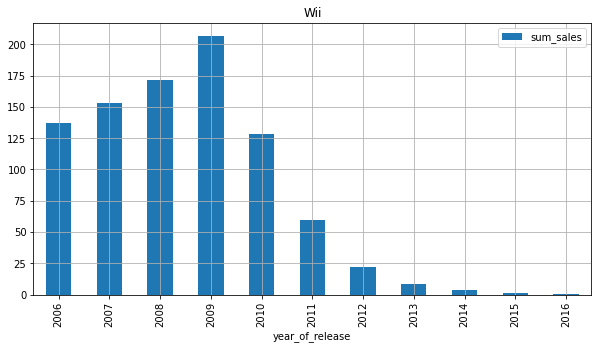

In [16]:
# создание гистограмм суммарных продаж по годам для 5 самых популярных платформ.
(games
    .query('platform == "PS2" and year_of_release < 2017')
    .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc=sum)
    .plot(grid=True, kind = 'bar',figsize = (10, 5))
);
plt.title('PS2') 
(games
    .query('platform == "X360" and year_of_release < 2017')
    .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc=sum)
    .plot(grid=True, kind= 'bar',figsize = (10, 5))
);
plt.title('X360')
(games
    .query('platform == "PS3" and year_of_release < 2017')
    .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc=sum)
    .plot(grid=True, kind = 'bar',figsize = (10, 5))
);
plt.title('PS3')
(games
    .query('platform == "DS" and 2000 < year_of_release < 2017')
    .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc=sum)
    .plot(grid=True, kind = 'bar',figsize = (10, 5))
);
plt.title('DS')
(games
    .query('platform == "Wii" and year_of_release < 2017')
    .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc=sum)
    .plot(grid=True, kind = 'bar',figsize = (10, 5))
);
plt.title('Wii');

**Вывод:** две из пяти топовых платформ уже не продаются - это повод задуматься о выборе данных за актуальный период. Игровая индустрия динамично развивается, одни платформы уходят, другие приходят, а некоторые трансформируются друг в друга (например линейка PS или Xbox). Старые данные(80-е, 90-е, 00- ые) уже не актуальны, думаю, для дальнейших исследований оптимально будет оставить данные за последние пять лет.

In [17]:
#1
ps2 = games.query('platform == "PS2" and year_of_release < 2017')
ps2_life = ps2['year_of_release'].max() - ps2['year_of_release'].min()
display(ps2_life)
#2
x360 = games.query('platform == "X360" and year_of_release < 2017')
x360_life = x360['year_of_release'].max() - x360['year_of_release'].min()
display(x360_life)
#3
ps3 = games.query('platform == "PS3" and year_of_release < 2017')
ps3_life = ps3['year_of_release'].max() - ps3['year_of_release'].min()
display(ps3_life)
#4
ds = games.query('platform == "DS" and 2000 <  year_of_release < 2017')
ds_life = ds['year_of_release'].max() - ds['year_of_release'].min()
display(ds_life)
#5
wii = games.query('platform == "Wii" and year_of_release < 2017')
wii_life = wii['year_of_release'].max() - wii['year_of_release'].min()
display(wii_life)
mean = (ps2_life + x360_life + ps3_life + ds_life + wii_life)/5
top_5_life = [ps2_life, x360_life, ps3_life, ds_life, wii_life]
print('Среднее время жизни платформы: ',mean, 'лет.')
print('Медианное время жизни платформы: ',statistics.median(top_5_life), 'лет.')

11

11

10

9

10

Среднее время жизни платформы:  10.2 лет.
Медианное время жизни платформы:  10 лет.


#### Вывод:
Средний цикл жизни игровой платформы в районе 10 лет, именно столько проходит от ее выхода на рынок до морального устаревания и полного исчезновения. 

# Предсказание прибыльности платформ

In [18]:
games = games.query('2011 < year_of_release < 2017')

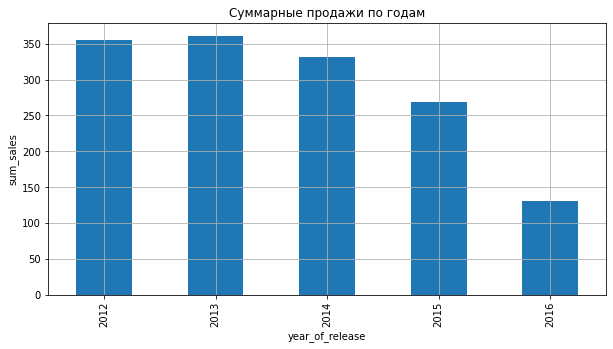

In [19]:
games.groupby('year_of_release')['sum_sales'].sum().plot(grid=True, kind = 'bar',figsize = (10, 5));
plt.title('Суммарные продажи по годам');
plt.ylabel('sum_sales');


**Примечание:** В 2016 году по сравнению с 2015-м наблюдается падение продаж более чем в два раза. Либо произошло обрушение рынка игр, либо данные были собраны не за весь год. Поэтому исключим 2016 год на графике, что бы неадекватные данные не влияли на зависимость.

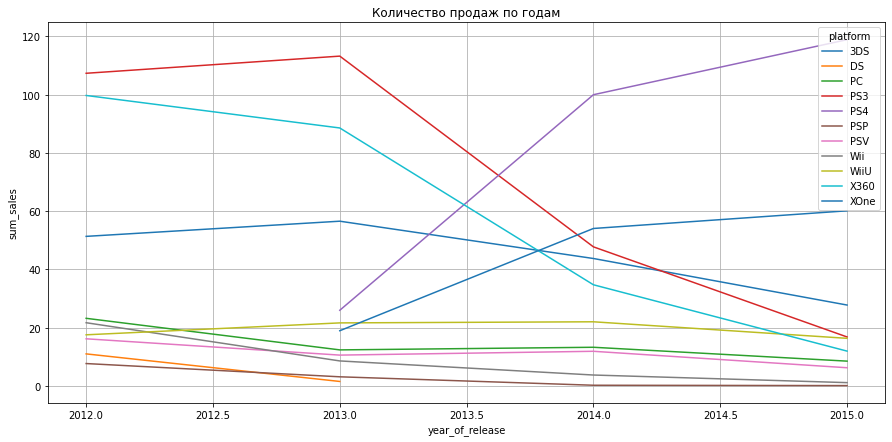

In [20]:
(games
    .query('year_of_release != 2016')
    .pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum')
    .plot(grid = True, figsize = (15, 7))
);
plt.xlabel('year_of_release')
plt.ylabel('sum_sales')
plt.title('Количество продаж по годам') 
plt.show() 

#### Вывод:
Лидируют по продажам и при этом растут с каждым годом два кита индустрии - PS4 и XOne. Они являются потенциально прибыльными, но для того, чтобы утверждать это точно - необходимо изучить данные по затратам на производство и реализацию. Продажи игр для остальных платформ снижаются год от года, и рассчитывать на их прибыльность в перспективе не приходится.

# Построение ящика с усами

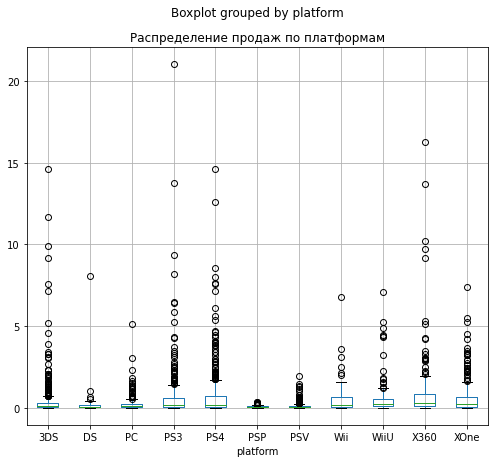

In [21]:
games.boxplot(by = 'platform', column = 'sum_sales', figsize = (8, 7), grid = True);
plt.title('Распределение продаж по платформам'); 

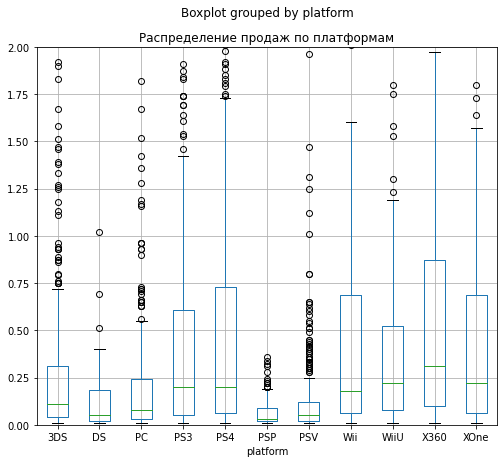

In [22]:
ax = games.boxplot(by = 'platform', column = 'sum_sales', figsize = (8, 7), grid = True);
plt.title('Распределение продаж по платформам');
ax.set_ylim(0, 2);

In [23]:
games.groupby('platform')['sum_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.0400,0.11,0.3125,14.60
DS,31.0,0.404839,1.439245,0.01,0.0200,0.05,0.1850,8.06
PC,250.0,0.250600,0.494640,0.01,0.0300,0.08,0.2400,5.14
PS3,493.0,0.585781,1.462855,0.01,0.0500,0.20,0.6100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
PSP,173.0,0.064682,0.071296,0.01,0.0200,0.03,0.0900,0.36
PSV,411.0,0.119659,0.203011,0.01,0.0200,0.05,0.1200,1.96
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.18,0.6875,6.76
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.22,0.5250,7.09


#### Вывод:
Большинство игр для консолей имеет невысокие средние продажи (медианы от 0,05 у PSV до 0,31 у X360), также по боксплотам видно, что большинство "выбросов" находится до значения 5. Однако случаются и "выстрелы", становящиеся хитами продаж, которые делают кассу. По хитам лидируют 3DS, PS3 и X360.

# Влияние оценки пользователей и критиков на продажи


Посмотрим, есть ли корреляции для платформ, имевших наибольшие продажи в последние годы. А затем взглянем на корреляции на основе всего массива данных.

In [24]:
corr = games.query('platform == "XOne"')[['critic_score', 'user_score', 'na_sales', 'eu_sales', 'jp_sales']].corr()
corr.style.background_gradient(cmap = 'coolwarm')


,critic_score,user_score,na_sales,eu_sales,jp_sales
critic_score,1.000000,0.472462,0.388636,0.379162,0.202954
user_score,0.472462,1.000000,-0.069318,-0.055911,0.069591
na_sales,0.388636,-0.069318,1.000000,0.765367,0.425725
eu_sales,0.379162,-0.055911,0.765367,1.000000,0.421071
jp_sales,0.202954,0.069591,0.425725,0.421071,1.000000


In [25]:
corr = games.query('platform == "X360"')[['critic_score', 'user_score', 'na_sales', 'eu_sales', 'jp_sales']].corr()
corr.style.background_gradient(cmap = 'coolwarm')


,critic_score,user_score,na_sales,eu_sales,jp_sales
critic_score,1.000000,0.557352,0.342341,0.354643,0.233093
user_score,0.557352,1.000000,-0.000710,0.017297,0.095023
na_sales,0.342341,-0.000710,1.000000,0.838446,0.524716
eu_sales,0.354643,0.017297,0.838446,1.000000,0.526260
jp_sales,0.233093,0.095023,0.524716,0.526260,1.000000


In [26]:
corr = games.query('platform == "PS4"')[['critic_score', 'user_score', 'na_sales', 'eu_sales', 'jp_sales']].corr()
corr.style.background_gradient(cmap = 'coolwarm')


,critic_score,user_score,na_sales,eu_sales,jp_sales
critic_score,1.000000,0.557654,0.415008,0.346720,0.322358
user_score,0.557654,1.000000,-0.020933,-0.048925,0.171332
na_sales,0.415008,-0.020933,1.000000,0.785362,0.472981
eu_sales,0.346720,-0.048925,0.785362,1.000000,0.464563
jp_sales,0.322358,0.171332,0.472981,0.464563,1.000000


In [27]:
corr = games.query('platform == "PS3"')[['critic_score', 'user_score', 'na_sales', 'eu_sales', 'jp_sales']].corr()
corr.style.background_gradient(cmap = 'coolwarm')


,critic_score,user_score,na_sales,eu_sales,jp_sales
critic_score,1.000000,0.539456,0.340216,0.305943,0.173506
user_score,0.539456,1.000000,-0.020536,-0.025522,0.181029
na_sales,0.340216,-0.020536,1.000000,0.842724,0.370904
eu_sales,0.305943,-0.025522,0.842724,1.000000,0.382929
jp_sales,0.173506,0.181029,0.370904,0.382929,1.000000


In [28]:
corr = games.query('platform == "WiiU"')[['critic_score', 'user_score', 'na_sales', 'eu_sales', 'jp_sales']].corr()
corr.style.background_gradient(cmap = 'coolwarm')


,critic_score,user_score,na_sales,eu_sales,jp_sales
critic_score,1.000000,0.770080,0.345783,0.372857,0.268769
user_score,0.770080,1.000000,0.386190,0.422393,0.339967
na_sales,0.345783,0.386190,1.000000,0.958772,0.808387
eu_sales,0.372857,0.422393,0.958772,1.000000,0.860098
jp_sales,0.268769,0.339967,0.808387,0.860098,1.000000


In [29]:
corr = games.query('platform == "3DS"')[['critic_score', 'user_score', 'na_sales', 'eu_sales', 'jp_sales']].corr()
corr.style.background_gradient(cmap = 'coolwarm')

,critic_score,user_score,na_sales,eu_sales,jp_sales
critic_score,1.000000,0.722762,0.328829,0.259721,0.307799
user_score,0.722762,1.000000,0.185631,0.118699,0.238252
na_sales,0.328829,0.185631,1.000000,0.931508,0.666101
eu_sales,0.259721,0.118699,0.931508,1.000000,0.684292
jp_sales,0.307799,0.238252,0.666101,0.684292,1.000000


In [30]:
corr = games[['critic_score', 'user_score', 'na_sales', 'eu_sales', 'jp_sales']].corr()
corr.style.background_gradient(cmap = 'coolwarm')

,critic_score,user_score,na_sales,eu_sales,jp_sales
critic_score,1.000000,0.517727,0.290240,0.283254,0.116596
user_score,0.517727,1.000000,-0.014217,-0.022042,0.163980
na_sales,0.290240,-0.014217,1.000000,0.767484,0.271010
eu_sales,0.283254,-0.022042,0.767484,1.000000,0.265134
jp_sales,0.116596,0.163980,0.271010,0.265134,1.000000


**Вывод:** И для отдельных платформ и для всех вместе есть несильная корреляция между оценкой пользователей и критиков. Также весьма интересной видится довольно сильная зависимость(>0.76) между продажами в Европе и Северной Америке для платформ. Наверно это можно объяснить схожей культурной и языковой средой, а также схожим маркетингом производителей игр, рассчитанным на "западную" аудиторию.
Еще обнаружена достаточно сильная зависимость между продажами во всех трех регионах для платформ WiiU и 3DS. Видимо игры для этих платформ пользуются схожим спросом по всему миру. 

Построим графики зависимости продаж от оценок пользователей и критиков:

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


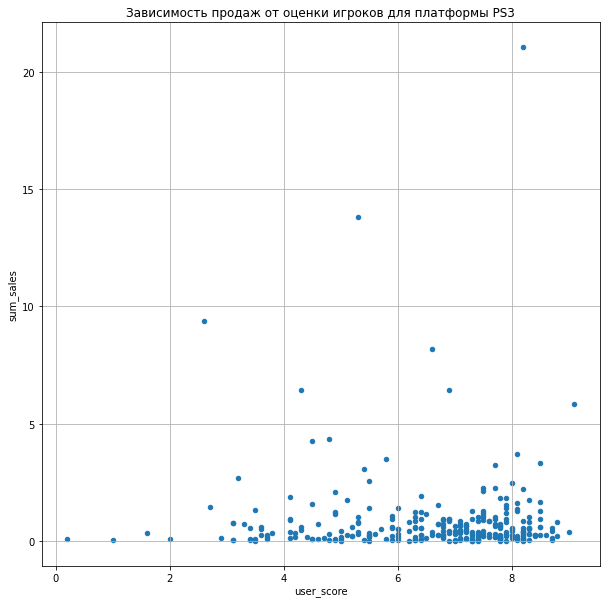

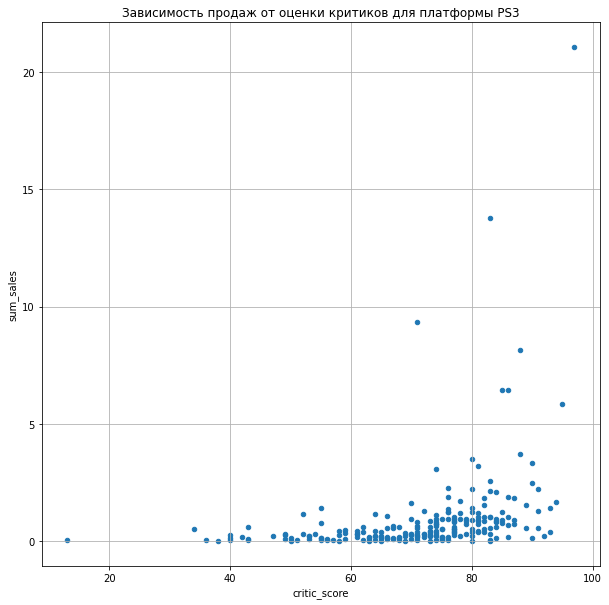

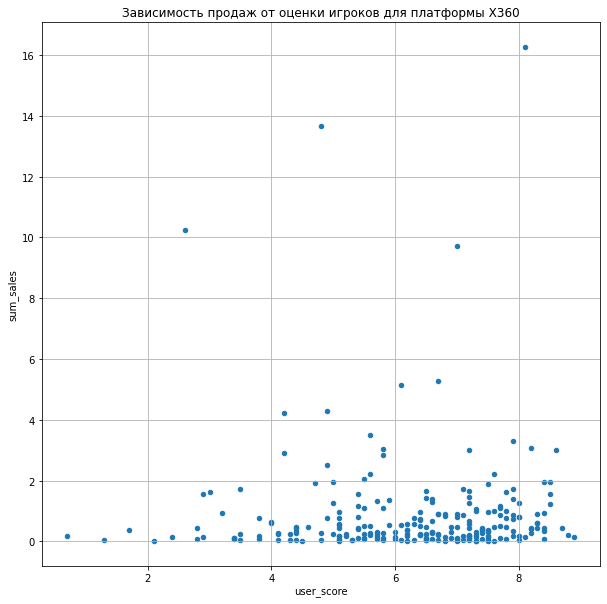

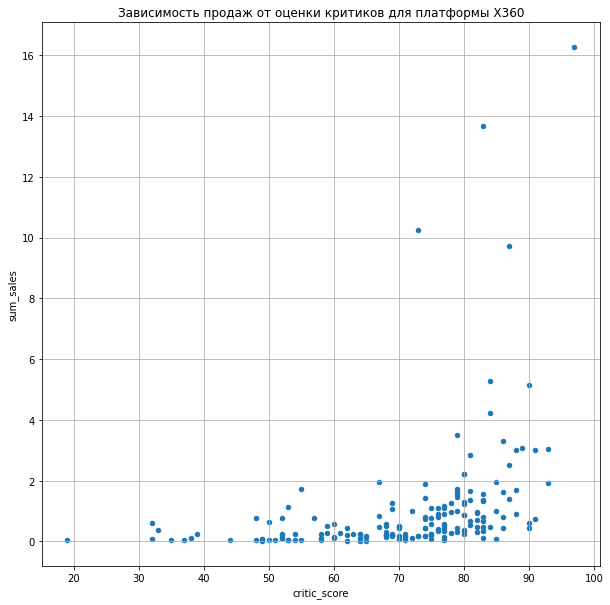

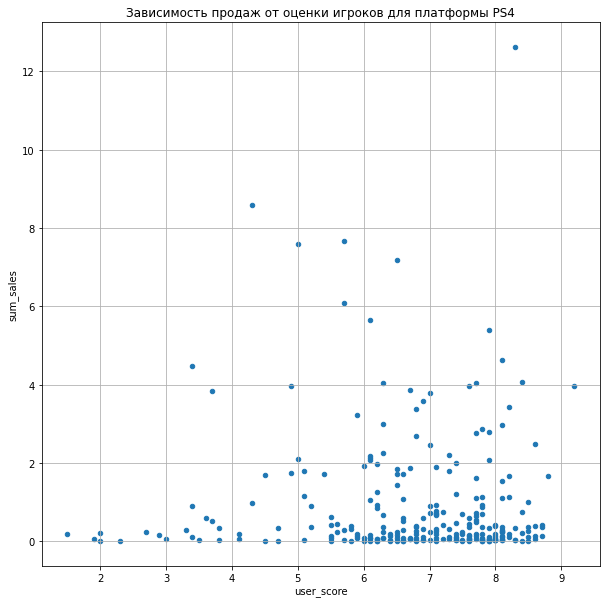

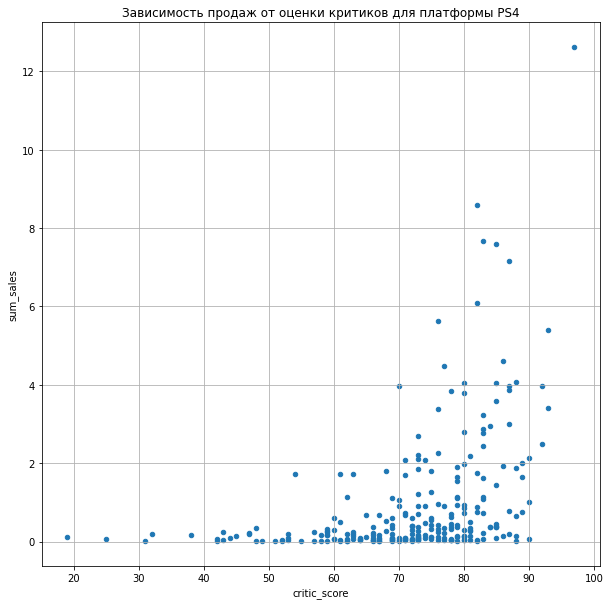

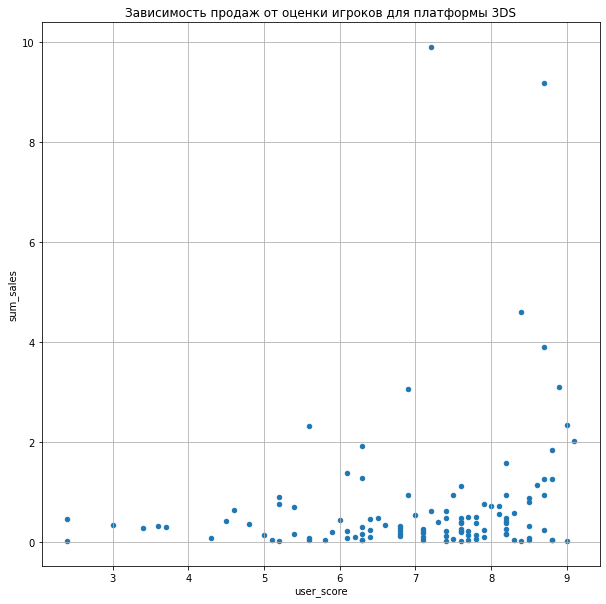

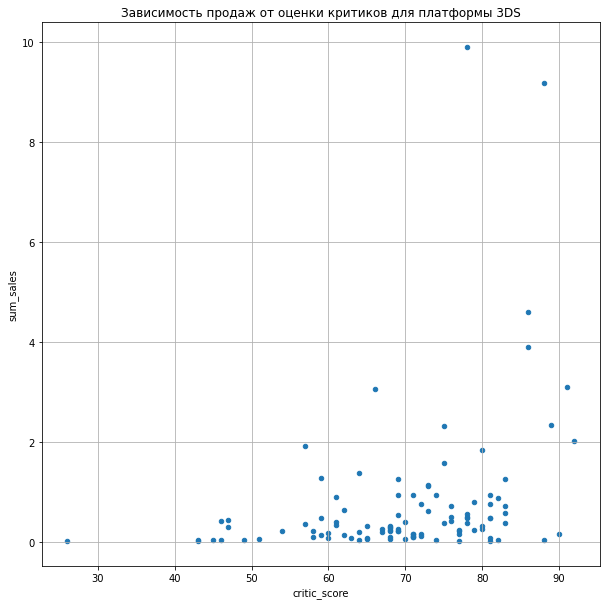

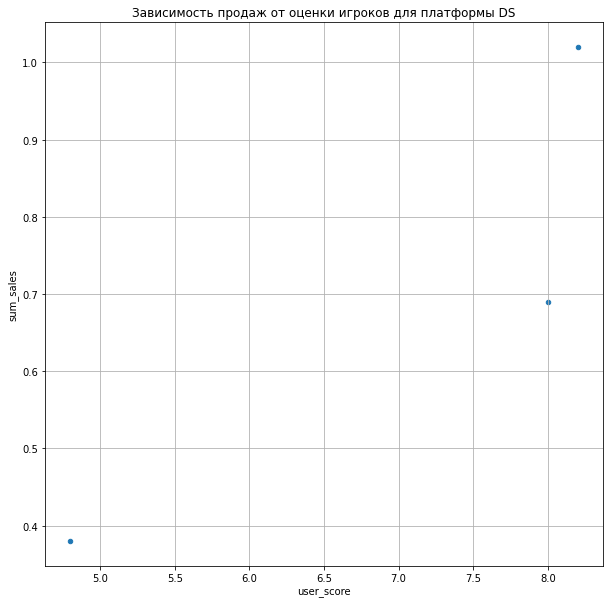

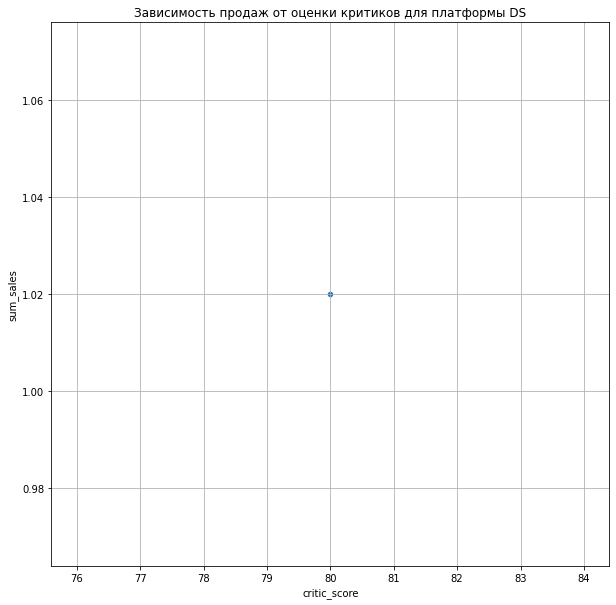

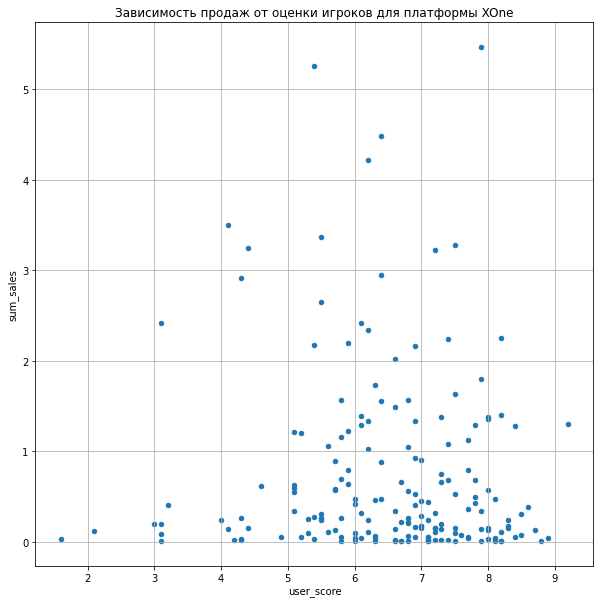

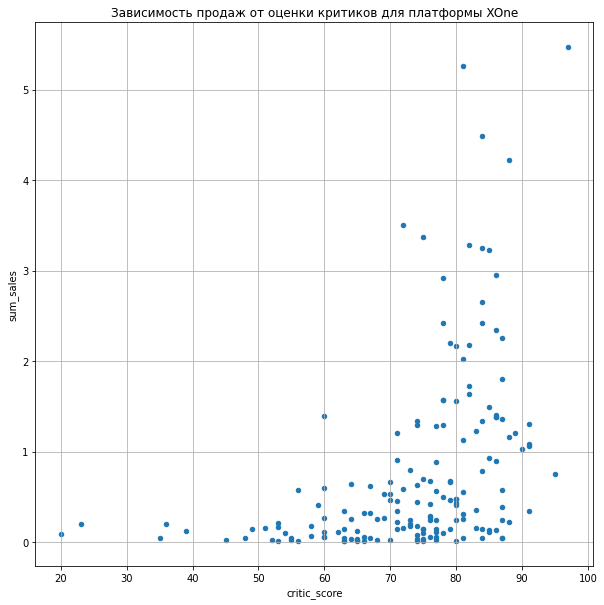

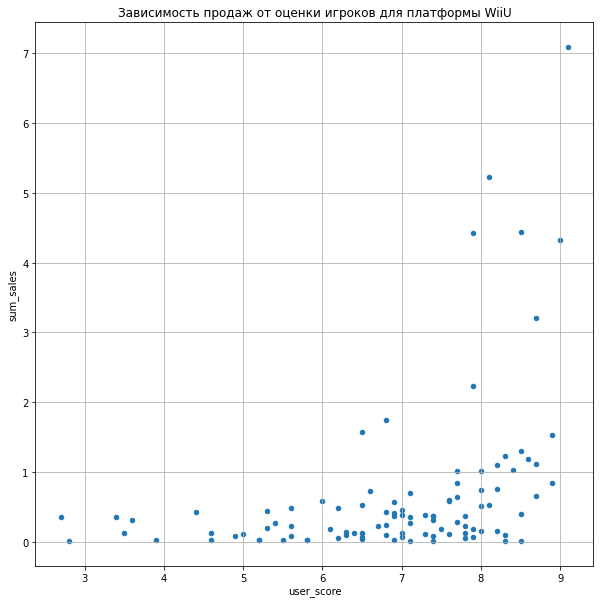

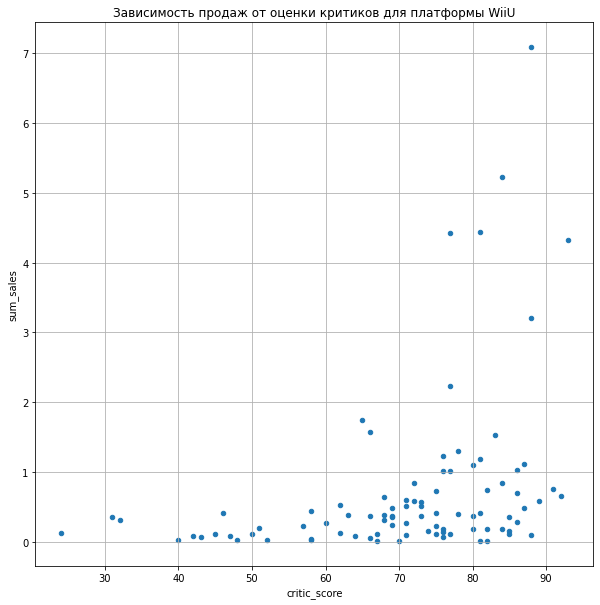

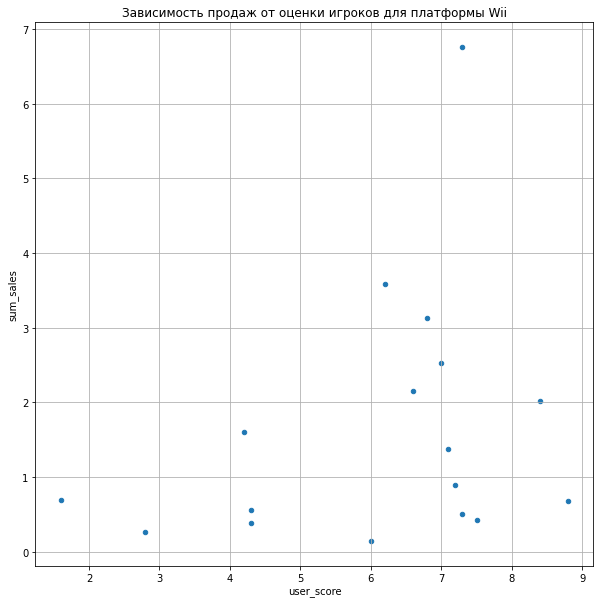

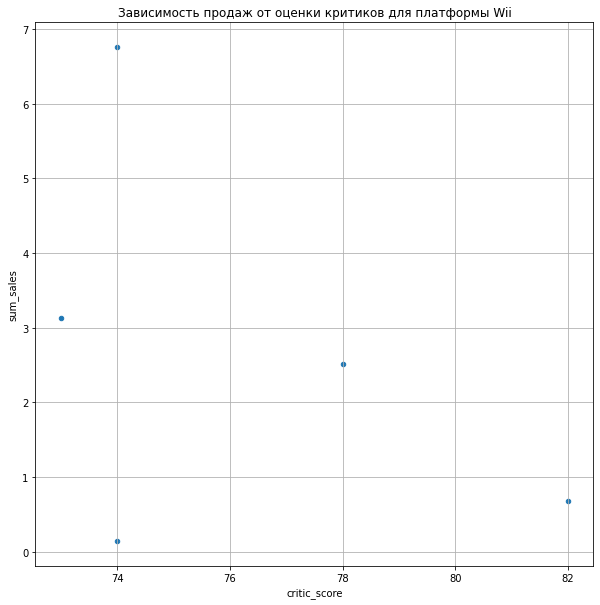

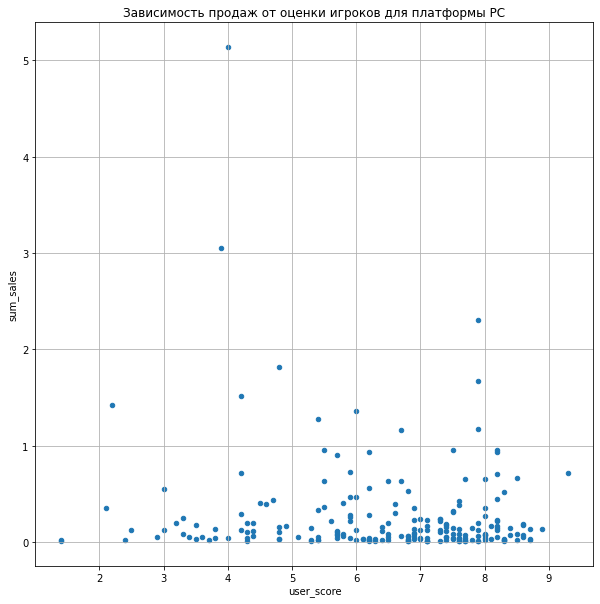

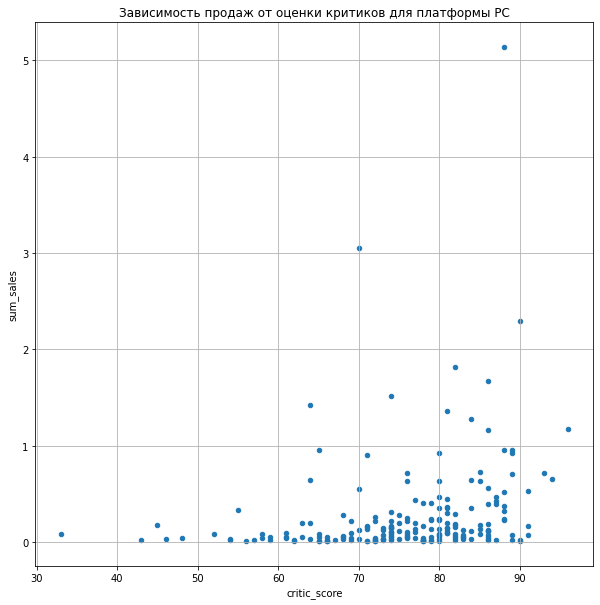

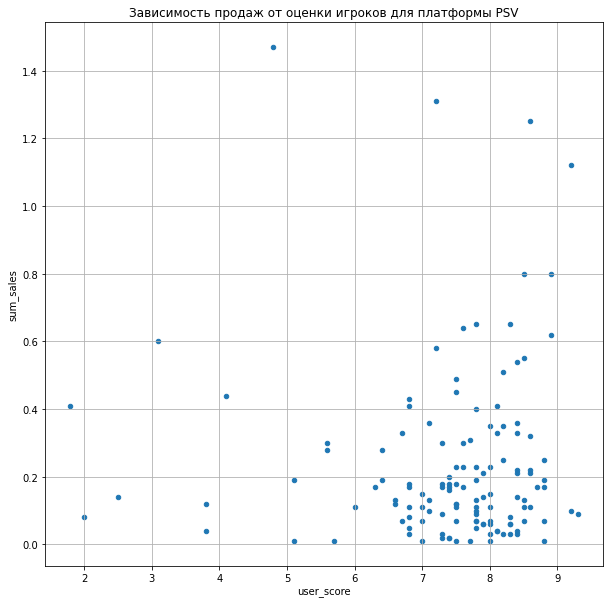

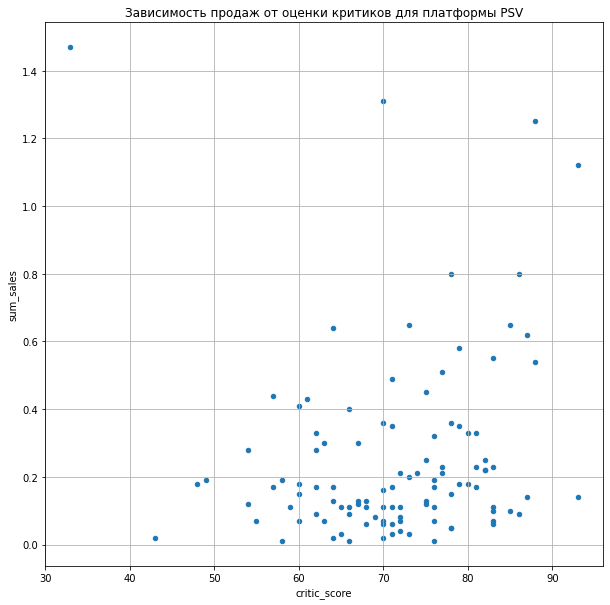

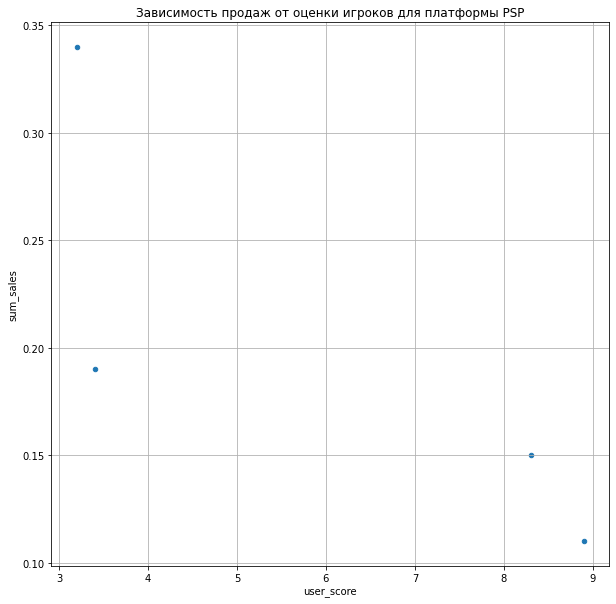

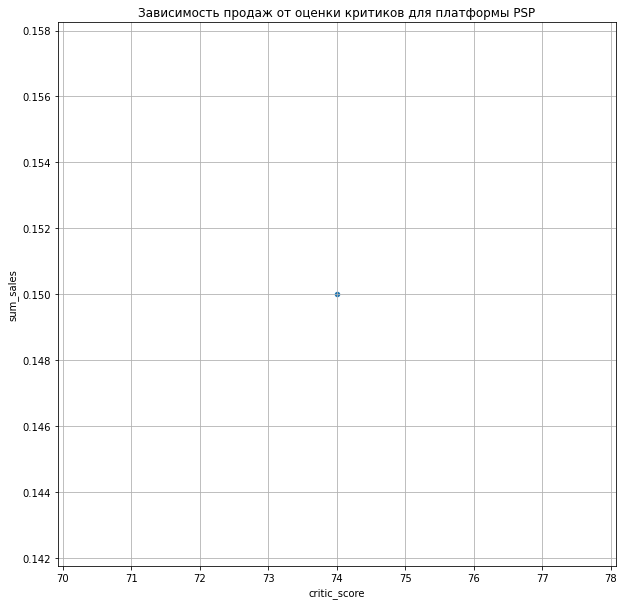

In [31]:
for p in games['platform'].unique():
    games.query('platform == @p').plot(grid = True, x = 'user_score', y = 'sum_sales', kind = 'scatter', figsize = (10, 10));
    plt.title('Зависимость продаж от оценки игроков для платформы {name}'.format(name = p));
    games.query('platform == @p').plot(grid = True, x = 'critic_score', y = 'sum_sales', kind = 'scatter', figsize = (10, 10));
    plt.title('Зависимость продаж от оценки критиков для платформы {name}'.format(name = p));

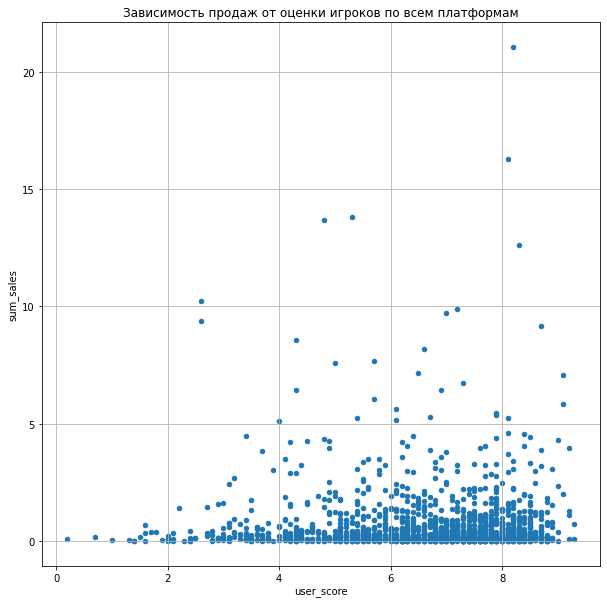

In [32]:
games.plot(grid = True, x = 'user_score', y = 'sum_sales', kind = 'scatter', figsize = (10, 10));
plt.title('Зависимость продаж от оценки игроков по всем платформам');

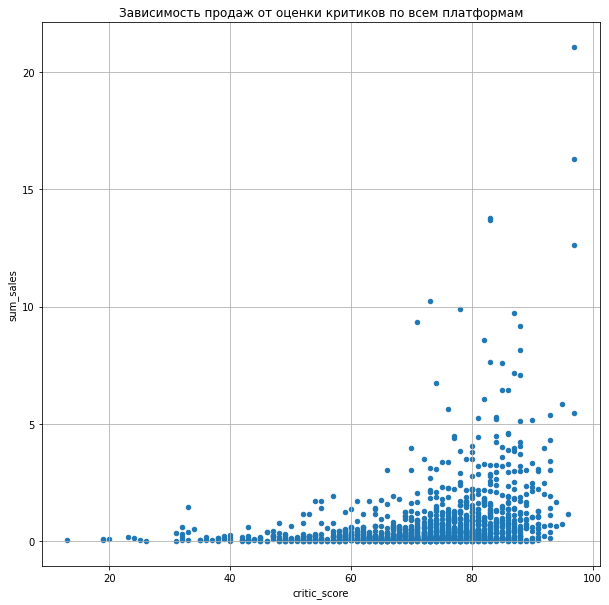

In [33]:
games.plot(grid = True, x = 'critic_score', y = 'sum_sales', kind = 'scatter', figsize = (10, 10));
plt.title('Зависимость продаж от оценки критиков по всем платформам');

#### Вывод:
В целом, чем выше рейтинг, тем выше продажи для обоих случаев, но зависимость нелинейная. И чем выше рейтинг, тем больше хитов, принесших приличную прибыль. 

# Распределение продаж по жанрам

In [34]:
display(games.groupby(by = 'genre').agg({'sum_sales':'sum'}).sort_values(by = 'sum_sales', ascending=False).head())
display(games.groupby(by = 'genre').agg({'sum_sales':'sum'}).sort_values(by = 'sum_sales', ascending=False).tail())

,sum_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04


,sum_sales
genre,
Fighting,44.49
Simulation,35.12
Adventure,29.43
Strategy,13.34
Puzzle,4.89


Посмотрим на распределение медианных значений по жанрам:

In [35]:
display(games.groupby('genre').agg({'sum_sales':'median'}).sort_values(by = 'sum_sales', ascending=False).head())
display(games.groupby('genre').agg({'sum_sales':'median'}).sort_values(by = 'sum_sales', ascending=False).tail())

,sum_sales
genre,
Shooter,0.44
Sports,0.24
Platform,0.21
Role-Playing,0.14
Racing,0.14


,sum_sales
genre,
Misc,0.120
Simulation,0.120
Strategy,0.080
Puzzle,0.045
Adventure,0.030


**Вывод:** Shooter, Sports и Platform смотрятся хорошо, а вот вкладывать деньги в рекламу Паззлов или приключенческих игр не стоит.

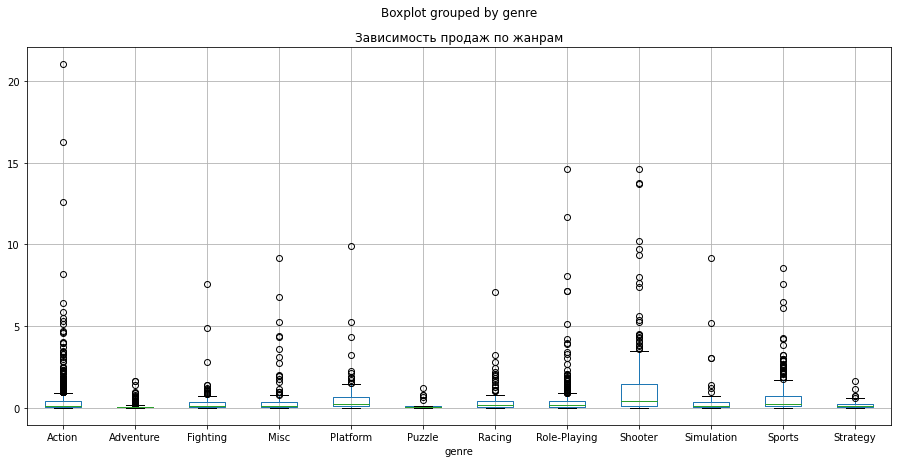

In [36]:
(games
    .boxplot(by = 'genre', column = 'sum_sales', figsize = (15, 7), grid = True)
);
plt.title('Зависимость продаж по жанрам');

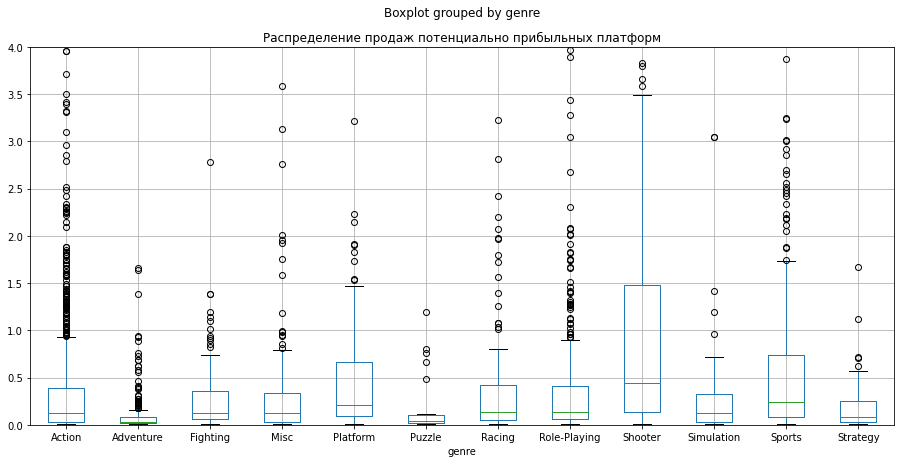

In [37]:
ax = games.boxplot(by = 'genre', column = 'sum_sales', figsize = (15, 7), grid = True);
plt.title('Распределение продаж потенциально прибыльных платформ');
ax.set_ylim(0, 4);

#### Вывод:
Самые высокие медианные значения у жанров Shooter и Sports. Людей привлекает формула, выведенная одним знатоком компьютерных игр: "Мясо, матюки, убийства и голые сиськи"; в спортивных играх высокая концкуренция, поэтому интересно играть, а роулплей позволяет побыть кем-то другим. 
Также интересное наблюдение, что в жанрах Shooter, Role-Playing и Action много выбросов больше 5. Если рискнуть и вложиться, можно много заработать. 

На дне по продажам паззлы, стратегии и приключения. Размеренный геймплей и необходимость думать, а не в азарте ломать джойстик, приводит к тому, что это узкоспециализированная ниша на любителя.

# Портрет пользователя каждого региона

In [38]:
top_5_EU_platform = ['PS4', 'PS3', 'XOne', '3DS', 'X360']
def cat_plat_EU(platform):
           
    if platform not in top_5_EU_platform:
        return 'Other_platform'
    else:
        return platform
games['new_platform_EU'] = games['platform'].apply(cat_plat_EU)    

In [39]:
top_5_NA_platform = ['PS4', 'PS3', 'XOne', '3DS', 'X360']
def cat_plat_NA(platform):
           
    if platform not in top_5_NA_platform:
        return 'Other_platform'
    else:
        return platform
games['new_platform_NA'] = games['platform'].apply(cat_plat_NA)    

In [40]:
top_5_JP_platform = ['PS4', 'PS3', 'PSV', '3DS', 'WiiU']
def cat_plat_JP(platform):
           
    if platform not in top_5_JP_platform:
        return 'Other_platform'
    else:
        return platform
games['new_platform_JP'] = games['platform'].apply(cat_plat_JP)    

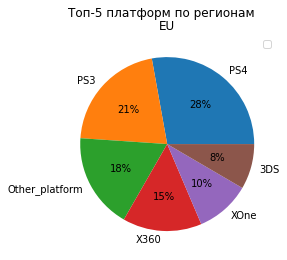

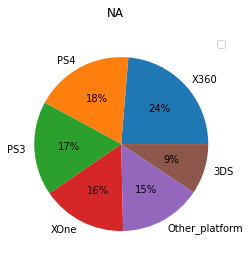

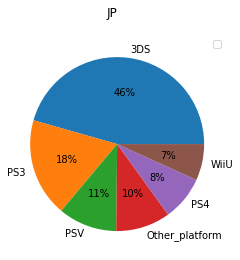

In [41]:
games.groupby('new_platform_EU').agg({'eu_sales':'sum'}).sort_values(by = 'eu_sales', ascending=False).head(6).plot(kind='pie', y='eu_sales', autopct='%1.0f%%', subplots=True, title = 'Топ-5 платформ по регионам');
plt.title('EU')
plt.ylabel('');
plt.legend('');
games.groupby('new_platform_NA').agg({'na_sales':'sum'}).sort_values(by = 'na_sales', ascending=False).head(6).plot(kind='pie', y='na_sales', autopct='%1.0f%%', subplots=True, title = 'NA');
plt.ylabel('');
plt.legend('');
games.groupby('new_platform_JP').agg({'jp_sales':'sum'}).sort_values(by = 'jp_sales', ascending=False).head(6).plot(kind='pie', y='jp_sales', autopct='%1.0f%%', subplots=True, title = 'JP');
plt.ylabel('');
plt.legend('');

In [42]:
top_5_EU = ['Action', 'Sports', 'Shooter', 'Role-Playing', 'Racing']
def cat_EU(genre):
           
    if genre not in top_5_EU:
        return 'Other_genre'
    else:
        return genre
games['new_genre_EU'] = games['genre'].apply(cat_EU)    

In [43]:
top_5_NA = ['Action', 'Sports', 'Shooter', 'Role-Playing', 'Misc']
def cat_NA(genre):
           
    if genre not in top_5_NA:
        return 'Other_genre'
    else:
        return genre
games['new_genre_NA'] = games['genre'].apply(cat_NA)    

In [44]:
top_5_JP = ['Action', 'Role-Playing', 'Misc', 'Fighting', 'Simulation']
def cat_JP(genre):
           
    if genre not in top_5_JP:
        return 'Other_genre'
    else:
        return genre
games['new_genre_JP'] = games['genre'].apply(cat_JP)    

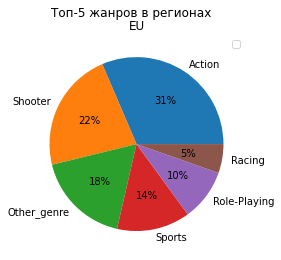

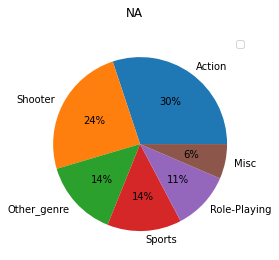

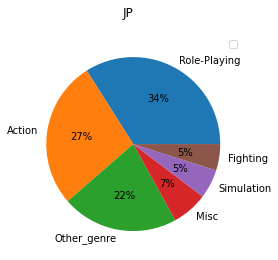

In [45]:
games.groupby('new_genre_EU').agg({'eu_sales':'sum'}).sort_values(by = 'eu_sales', ascending=False).head(6).plot(kind='pie', y='eu_sales', autopct='%1.0f%%', subplots=True, title = 'Топ-5 жанров в регионах');
plt.title('EU');
plt.ylabel('');
plt.legend('');
games.groupby('new_genre_NA').agg({'na_sales':'sum'}).sort_values(by = 'na_sales', ascending=False).head(6).plot(kind='pie', y='na_sales', autopct='%1.0f%%', subplots=True, title = 'NA');
plt.ylabel('');
plt.legend('');
games.groupby('new_genre_JP').agg({'jp_sales':'sum'}).sort_values(by = 'jp_sales', ascending=False).head(6).plot(kind='pie', y='jp_sales', autopct='%1.0f%%', subplots=True, title = 'JP');
plt.ylabel('');
plt.legend('');

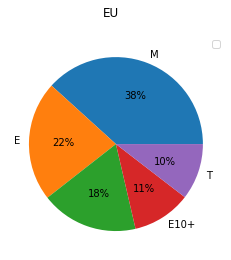

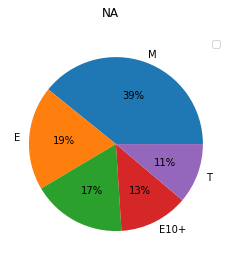

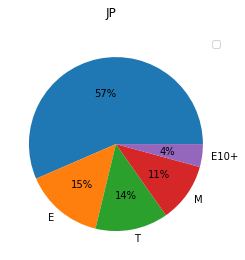

In [46]:
games.groupby(by = 'rating').agg({'eu_sales':'sum'}).sort_values(by = 'eu_sales', ascending=False).head(5).plot(kind='pie', y='eu_sales', autopct='%1.0f%%', subplots=True, title = 'EU');
plt.ylabel('');
plt.legend('');
games.groupby(by = 'rating').agg({'na_sales':'sum'}).sort_values(by = 'na_sales', ascending=False).head(5).plot(kind='pie', y='na_sales', autopct='%1.0f%%', subplots=True, title = 'NA');
plt.ylabel('');
plt.legend('');
games.groupby(by = 'rating').agg({'jp_sales':'sum'}).sort_values(by = 'jp_sales', ascending=False).head(5).plot(kind='pie', y='jp_sales', autopct='%1.0f%%', subplots=True, title = 'JP');
plt.ylabel('');
plt.legend('');

#### Вывод: 
Жанры игр в Северной Америке, Европе и Японии публика предпочитает одни и те же. В западном полушарии самые востребованные Action и Shooter игры 31% и 22% - Европа, 30% и 24% Америка. А в Японии роулплей на первом месте - 34% всех игр(у японцев и косплей и роулплей в крови), Экшн позади - 27%. 

По игровым платформам отличия более существенные: американцы предпочитают отечественный Xbox и XOne 24% и 16%, а PS3 17% и PS4 18% чуть уступают. У европейцев "сонька"  впереди Xbox: 28% PS4 и 21% PS3, 15% X360 и 10% XOne, а японцы играют только на своих платформах 3DS 46%, PS3 18% и PSV 11% (или патриотизм или отсутствие знания английского и адекватной локализаци). В разы различаются и продажи в этих регионах: больше всего продаж в Северной Америке, меньше всего в Японии. Думаю, тут объясняется все просто - размером рынка. 

Зависимость продаж от рейтинга присутствует во всех регионах. Самые популярные игры с рейтингом "для взрослых"(вспоминаем формулу знатока). Другие популярные рейтинги "для всех", "подросткам","детям старше 10 лет". У японцев система рейтингов локально-специфическая, а потому большинство игр не обладает каким-либо рейтингом по ESRB.

В общем, средний игрок из Западного полушария желает стрельбы, драк и погонь, и чтобы все "по-взрослому", а житель страны восходящего солнца не прочь на денек побыть отважным самураем(или симпатичной гейшей?).

**СОВЕТ**: Стоит вложить деньги в разработку и продвижение игры в жанре Action/Shooter для PS4 и/или XOne. Это самые востребованные жанры на самых популярных консолях, поэтому при надлежащем качестве продукта прибыль практически гарантирована.

# Проверка гипотез

Итак, у нас есть две гипотезы:

H0. Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.

H1. Средние пользовательские рейтинги платформ Xbox One и PC различны.

In [47]:
alpha = 0.05
xbox = games[(games['platform'] == 'XOne') & (games['user_score'] > 0)]['user_score']
pc = games[(games['platform'] == 'PC') & (games['user_score'] > 0)]['user_score']
if np.var(xbox) == np.var(pc):
    print('True')
else:
    print('False')

False


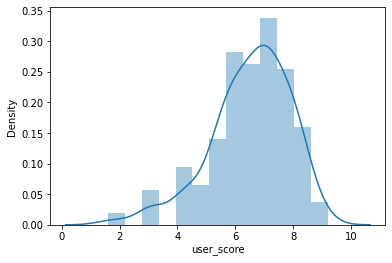

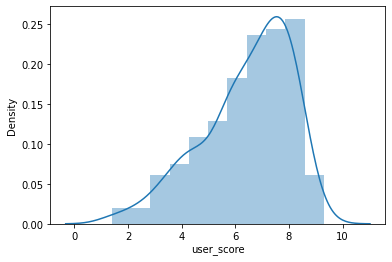

In [48]:
warnings.filterwarnings('ignore')
sns.distplot(xbox)
plt.show();
sns.distplot(pc)
plt.show();

Для наших выборок распределение нормальное, дисперсии не равны, а потому используем t-тест:

In [49]:
results = scipy.stats.ttest_ind(xbox, pc, equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


H0. Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковы.

H1. Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

In [50]:
alpha = 0.05
action = games[(games['genre'] == 'Action') & (games['user_score'] > 0)]['user_score']
sports = games[(games['genre'] == 'Sports') & (games['user_score'] > 0)]['user_score']
if np.var(action) == np.var(sports):
    print('True')
else:
    print('False')

False


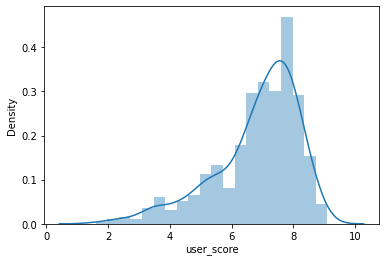

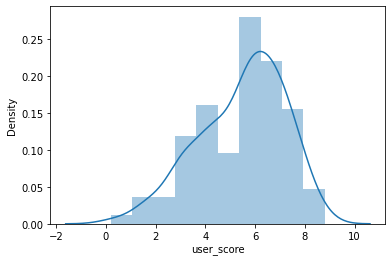

In [51]:
sns.distplot(action)
plt.show()
sns.distplot(sports)
plt.show()

Для наших выборок распределение нормальное, дисперсии не равны, а потому используем t-тест:

In [52]:
results = scipy.stats.ttest_ind(action, sports, equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


#### Вывод:
В обоих случаях мы сформулировали нулевую гипотезу, как "средние двух генеральных совокупностей равны между собой". Альтернативная гипотеза была "средние двух генеральных совокупностей не равны между собой".

Для проверки двусторонних гипотез применяли t-критерий Стьюдента. Применяли его потому, что исходные данные нормально распределены.

Отвергнуть нулевую гипотезу в первом случае не удалось, а потому считаем пользовательские рейтинги для платформ Xbox и PC одинаковыми. Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») различны, так как p-value меньше допустимого уровня значимости.

# Общий вывод

В ходе работы было сделано следующее:

1) изучен датасет, содержащий 11 столбцов, из них 6 имели вещественный тип данных, а 5 тип object. В столбцах с оценками и рейтингами было обнаружено значительное количество пропусков(порой до 50%), которые решено было не заменять и не удалять, дабы не вносить искажения в данные. Причиной пропусков является то, что в Европе и Японии используют свои рейтинговые системы, а в полученном массиве по ним просто не было данных.

2) Столбец years_of_release был переведен в целочисленный формат, а user_score в вещественный. Были посчитаны суммарные продажи во всех регионах и добавлены в новый столбец sum_sales.

В ходе исследовательского анализа были сделаны следующие выводы:

1) Количество выходящих игр в год в начале восьмидесятых составляло десятки, потом шло увеличение выпуска, пока в конце нулевых не было достигнуто пиковое значение в 1427 штуки за год, а потом индустрия стала выпускать с каждым годом все меньше новинок.

2) Самая популярная игровая платформа за все время PS2, в топе также X360, PS3, Wii и DS. Среднее время жизни платформы 14 лет (медианное 11)

3) На основе данных о продажах за последние годы самыми потенциально прибыльными смотрятся XOne и PS4, остальные платформы на спаде.

4) Чем выше рейтинг игры, тем выше ее продажи и тем больше шанс стать хитом и принести значительную прибыль. 

5) Самые популярные жанры Action и Shooter. Далее идут спорт и RPG. Самые слабо продаваемые паззлы и стратегии. 

6) Составлен портрет среднего игрока для разных регионов: человек из Северной Америки или Европы отдаст предпочтение игре action или Shooter(рейтинг M) на консоле PS или Xbox, а японец сыграет в RPG или Action на одной из отечественных платформ.

7) Были проверены две гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Первая была оставлена в силе, вторая отвергнута.


# Рекомендации рекламному отделу:

Стоит вложить деньги в продвижение игры в жанре Action/Shooter для PS4 и/или XOne в Северной Америке или Европе с рейтингом M.
На отзывы стоит обращать внимание, поэтому лучше договориться с известными блогерами, чтобы они поиграли в бета-версию перед выходом и составили положительные рецензии.